Saving bank.csv to bank.csv
Saving bank-full.csv to bank-full.csv
✅ Dataset loaded successfully!

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no   

Shape: (452

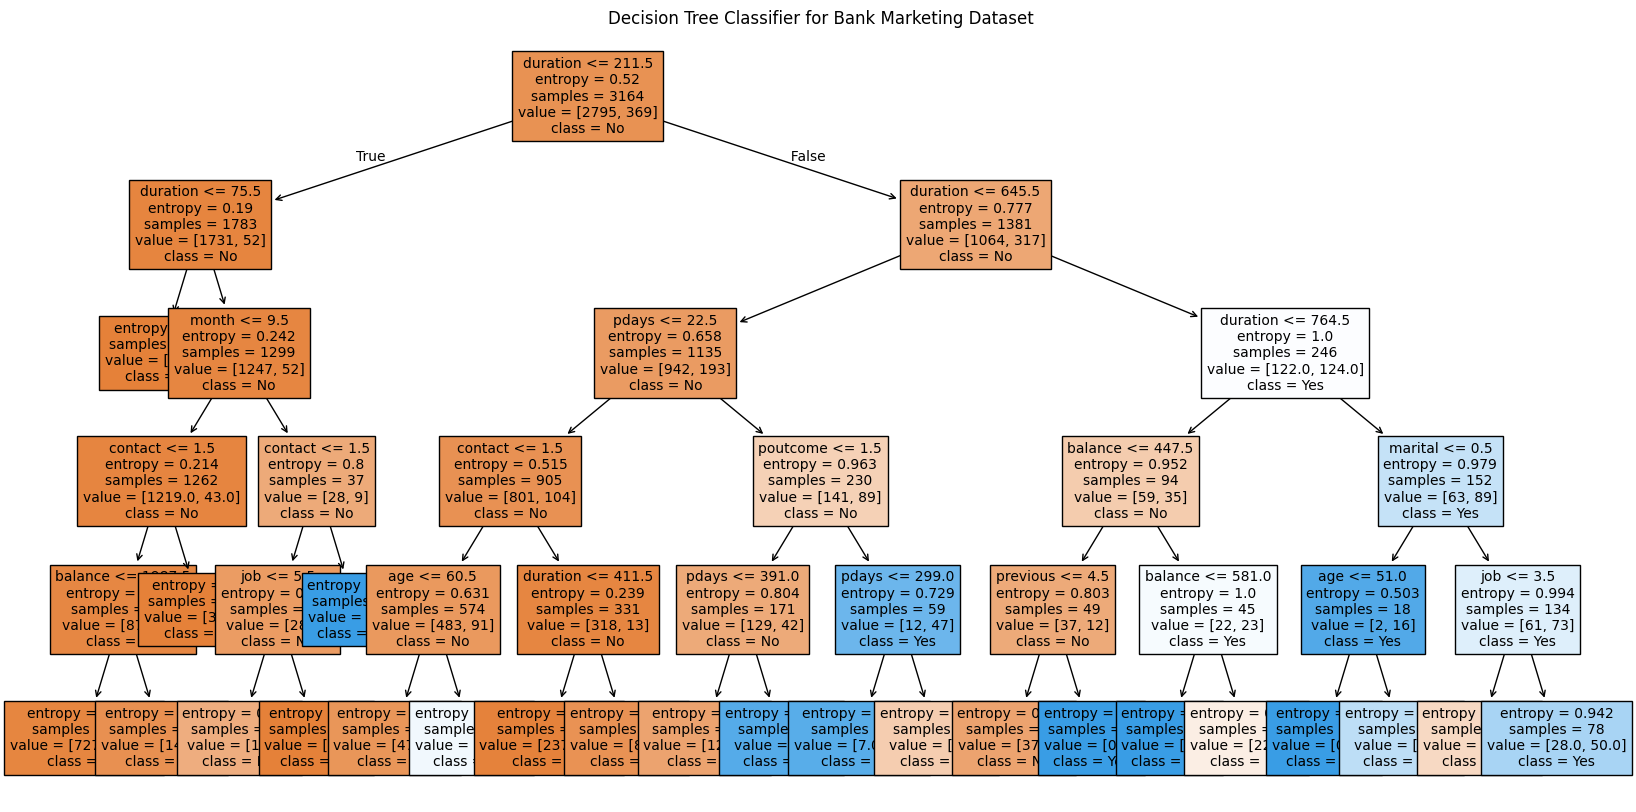

In [1]:
# ============================================
# 🧠 Bank Marketing Decision Tree Classifier
# ============================================

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the dataset
# (Upload 'bank.csv' or use a dataset URL from UCI)
from google.colab import files
uploaded = files.upload()  # Upload 'bank.csv' here

# Read the uploaded CSV
df = pd.read_csv("bank.csv", sep=';')

# Step 3: Display basic info
print("✅ Dataset loaded successfully!\n")
print(df.head(), "\n")
print("Shape:", df.shape)

# Step 4: Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 5: Split data into features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = clf.predict(X_test)

# Step 9: Evaluate performance
print("\n🎯 Model Evaluation Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Decision Tree Classifier for Bank Marketing Dataset")
plt.show()
